In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import xarray as xr
import os
import matplotlib.ticker as ticker
dpi = 150
fs = 15

workdir = '/Users/diana/Dropbox/UW/Research/rasm/rasm_project_meeting_oct2016/'

In [2]:
'''coupler_fields = ['x2lavg_Sa_z', 'x2lavg_Sa_u', 'x2lavg_Sa_v', 'x2lavg_Sa_tbot', 'x2lavg_Sa_ptem', 
                 'x2lavg_Sa_shum', 'x2lavg_Sa_pbot', 'x2lavg_Faxa_rainc', 'x2lavg_Faxa_rainl', 
                 'x2lavg_Faxa_snowc', 'x2lavg_Faxa_snowl', 'x2lavg_Faxa_lwdn', 'x2lavg_Faxa_swndr', 
                 'x2lavg_Faxa_swvdr', 'x2lavg_Faxa_swndf', 'x2lavg_Faxa_swvdf', 'x2lavg_Flrr_flood', 
                 'l2xavg_Flrl_rofice', 'l2xavg_Flrl_rofliq', 'l2xavg_Fall_evap', 'l2xavg_Fall_lwup', 
                 'l2xavg_Fall_sen', 'l2xavg_Fall_lat', 'l2xavg_Fall_tauy', 'l2xavg_Fall_taux', 
                 'l2xavg_Fall_swnet', 'l2xavg_Sl_u10', 'l2xavg_Sl_snowh', 'l2xavg_Sl_ram1', 'l2xavg_Sl_fv', 
                 'l2xavg_Sl_t', 'l2xavg_Sl_logz0', 'l2xavg_Sl_qref', 'l2xavg_Sl_tref', 'l2xavg_Sl_anidf', 
                 'l2xavg_Sl_avsdf', 'l2xavg_Sl_anidr', 'l2xavg_Sl_avsdr']'''
cpl_variables_to_plot = ['l2xavg_Fall_sen']
hist_variables_to_plot = ['OUT_LATENT']

In [3]:
# load data
hist_file_load = xr.open_dataset(os.path.join(workdir, 'rasm_data_atm', 'fluxes_monthly_1yr.1948-09.nc'))

# cpl_vic5 = xr.open_dataset(os.path.join(workdir, 'rasm_data_atm', 'vic5.RI.test.20170212a.cpl.ha.1948-09.nc'))

months = ['09', '10', '11', '12', '01', '02', '03', '04', '05', '06', '07', '08']
years = ['1948', '1948', '1948', '1948', '1949', '1949', '1949', '1949', '1949', '1949', '1949', '1949']

AttributeError: Unknown property add_labels

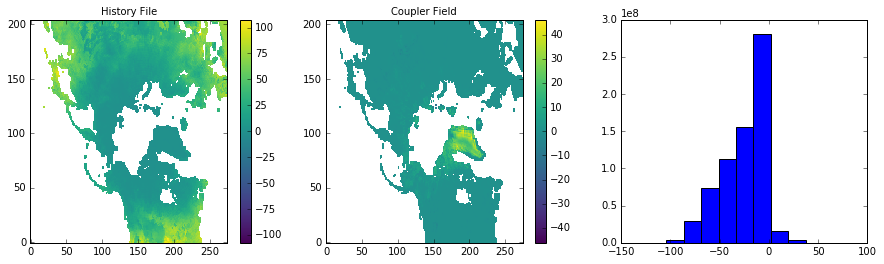

In [4]:
# loop over variables
fs = 10
for j, month in enumerate(months):
    
    # process data
    hist_file = hist_file_load.isel(time=j)
    
    vic5_filename = 'vic5.RI.test.20170212a.cpl.ha.%s-%s.nc' %(years[j], month)
    cpl_vic5 = xr.open_dataset(os.path.join(workdir, 'rasm_data_atm', vic5_filename))
    
    kwargs = {'cbar_label': }
    
    for j, cpl_var in enumerate(cpl_variables_to_plot): 
        hist_var = hist_variables_to_plot[j]
        fig, axs = plt.subplots(1,3, figsize=(15, 4))
        for i, axes in enumerate(axs.ravel()): 
            if i == 0: 
                vmin = hist_file[hist_var].min()
                vmax = hist_file[hist_var].max()
                hist_file[hist_var].plot(cmap='viridis', ax=axes, add_labels=False)
                axes.set_title('History File', size=fs)
            elif i == 1: 
                cpl_vic5[cpl_var].plot(cmap='viridis', ax=axes, add_labels=False)
                axes.set_title('Coupler Field', size=fs)
            elif i == 2: 
                (cpl_vic5[cpl_var] - hist_file[hist_var]).plot(cmap='bwr', ax=axes, add_labels=False)
                axes.set_title('Coupler Field - History File', size=fs)
            else: 
                print("%f should not be iterating to this value" % i)
        
        direc = os.path.join(workdir, 'rasm_data_atm', 'plots', 'historyfile_couplerfield', hist_var)
        os.makedirs(direc, exist_ok=True)
        fig.suptitle('%s %s %s %s' % (month, years[j], variable, cpl_vic4[variable].long_name), size=fs)
        plotname = '%s-%s.png' %(month, years[j])
        savepath = os.path.join(direc, plotname)
        plt.savefig(savepath, format='png', dpi=dpi, bbox_inches='tight')
        plt.cla()
    print("saved figure for %s %s" % (month, years[j]))

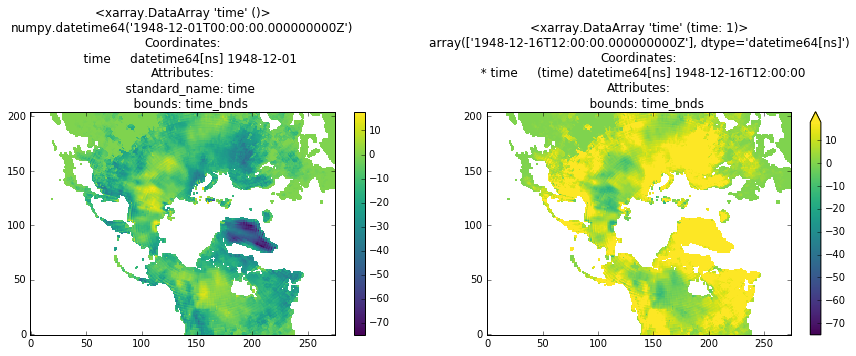

In [16]:
fig, axs = plt.subplots(1,2, figsize=(15, 4))
j = 3

cpl_var = 'l2xavg_Fall_sen'
hist_var = 'OUT_SENSIBLE'

hist_file = hist_file_load.isel(time=j)
vmin = hist_file[hist_var].min()
vmax = hist_file[hist_var].max()
hist_file[hist_var].plot(cmap='viridis', ax=axs[0], add_labels=False, vmin=vmin, vmax=vmax)
axs[0].set_title(hist_file.time)

vic5_filename = 'vic5.RI.test.20170212a.cpl.ha.%s-%s.nc' %(years[j], months[j])
cpl_vic5 = xr.open_dataset(os.path.join(workdir, 'rasm_data_atm', vic5_filename))
cpl_vic5[cpl_var].plot(cmap='viridis', ax=axs[1], add_labels=False, vmin=vmin, vmax=vmax)
axs[1].set_title(cpl_vic5.time)

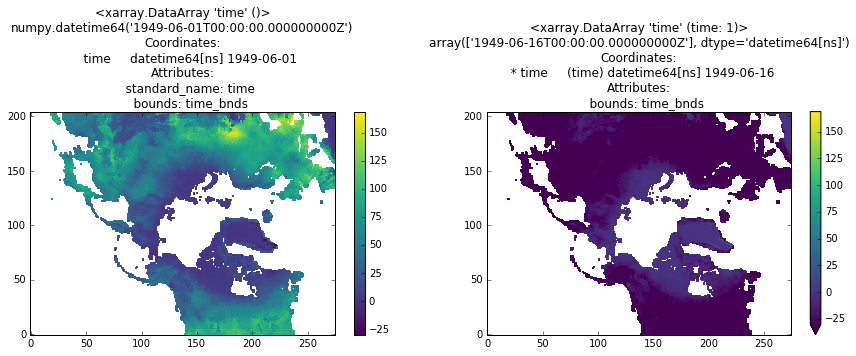

In [18]:
fig, axs = plt.subplots(1,2, figsize=(15, 4))
j = 9

cpl_var = 'l2xavg_Fall_lat'
hist_var = 'OUT_LATENT'

hist_file = hist_file_load.isel(time=j)
vmin = hist_file[hist_var].min()
vmax = hist_file[hist_var].max()
hist_file[hist_var].plot(cmap='viridis', ax=axs[0], add_labels=False, vmin=vmin, vmax=vmax)
axs[0].set_title(hist_file.time)

vic5_filename = 'vic5.RI.test.20170212a.cpl.ha.%s-%s.nc' %(years[j], months[j])
cpl_vic5 = xr.open_dataset(os.path.join(workdir, 'rasm_data_atm', vic5_filename))
cpl_vic5[cpl_var].plot(cmap='viridis', ax=axs[1], add_labels=False, vmin=vmin, vmax=vmax)
axs[1].set_title(cpl_vic5.time)